In [19]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import matplotlib


In [20]:
matplotlib.rcParams['font.family'] = 'serif'
DEMOGRAPHIC_ORDER=['East Asian','Black','Indian','White','Female','Male']

In [21]:
sex_averages = pd.read_csv('respondent_sex_averages.csv',index_col=0)
race_averages = pd.read_csv('respondent_race_averages.csv',index_col=0)

sex_averages = sex_averages.rename(columns={'sex': 'Respondent Demographic','Pseudo-Verification': 'Verification Accuracy'})
race_averages= race_averages.rename(columns={'race': 'Respondent Demographic','Pseudo-Verification': 'Verification Accuracy'})



In [22]:
all_results = pd.concat([sex_averages,race_averages])

all_results = all_results[(~all_results['Respondent Demographic'].isin(['Male', 'Female','Arab or Middle Eastern', 'East Asian','South Asian'])) & (~all_results['Demographic'].isin(['Male', 'Female']))]

In [23]:
all_results['Dataset'].unique()

array(['SDv2.1 Celebrities', 'Realism Non-Celebrities',
       'Realism Celebrities'], dtype=object)

In [24]:
all_results

,Demographic,Dataset,Respondent Demographic,Q1,Verification Accuracy
26,White,SDv2.1 Celebrities,White or Caucasian,0.971963,0.985981
27,Black,SDv2.1 Celebrities,White or Caucasian,0.971963,0.985981
28,Black,SDv2.1 Celebrities,Hispanic or Latino,0.970149,0.985075
29,Indian,Realism Non-Celebrities,Hispanic or Latino,0.969697,0.984848
30,Indian,Realism Celebrities,Black or African American,0.969231,0.984615
31,Indian,Realism Celebrities,Hispanic or Latino,0.968254,0.984127
32,Black,SDv2.1 Celebrities,Black or African American,0.965909,0.982955
33,Indian,SDv2.1 Celebrities,White or Caucasian,0.964912,0.982456
35,White,Realism Celebrities,White or Caucasian,0.958466,0.979233
36,White,Realism Celebrities,Hispanic or Latino,0.958333,0.979167


In [25]:
all_results = all_results.replace('Asian','East\nAsian')

In [26]:
cols_fields = all_results['Respondent Demographic'].unique()

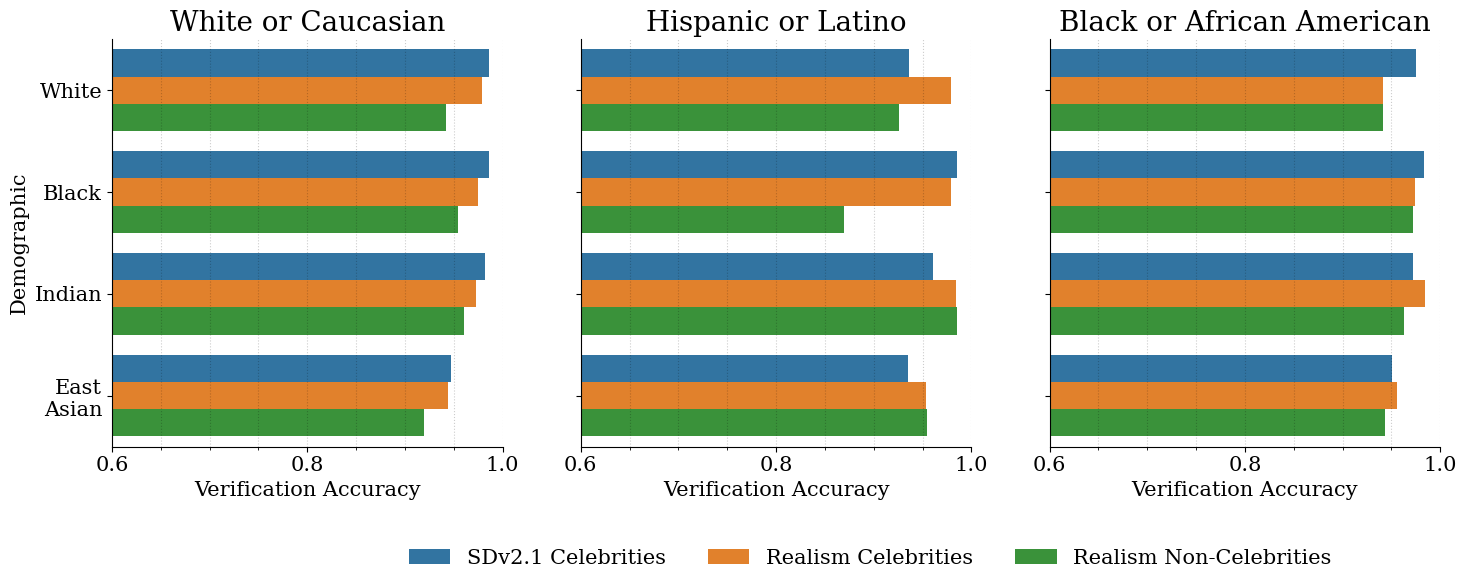

In [27]:
ax = sns.catplot(data=all_results,x='Verification Accuracy',y="Demographic",hue='Dataset',kind='bar',col='Respondent Demographic',col_order=cols_fields,
                 margin_titles=True,hue_order=['SDv2.1 Celebrities','Realism Celebrities','Realism Non-Celebrities'])
ax.set_titles(fontsize=50,col_template="{col_name}")
ax.set(xlim=[0.6,1],xticks=[0.6,0.8,1])
plt.subplots_adjust(wspace=0.2)
minorLocator = AutoMinorLocator()

for axs in ax.axes.flat:
    axs.tick_params(axis="x", labelsize=15)  # Adjust labelsize as needed
    axs.tick_params(axis="y", labelsize=15)  # Adjust labelsize as needed
    axs.title.set_fontsize(20)
    axs.xaxis.grid(True,which='both',color='black',linestyle='dotted',alpha=0.2) 
    # axs.axvline(0.5, color='black', linestyle='dashed', linewidth=0.5, alpha=1)
    axs.xaxis.set_minor_locator(minorLocator)
    
    # axs.axvline(0.6, color='black', linestyle='dashed', linewidth=0.5, alpha=1) 
    # axs.axvline(0.5, color='b', linestyle='dashed', linewidth=0.5, alpha=1) 
sns.move_legend(ax, "upper center", bbox_to_anchor=(0.5, -0.05),ncol=4,title=None,fontsize=15,)
# ax.set_xticklabels(fontsize=15) 
ax.set_xlabels(fontsize=15)
ax.set_ylabels(fontsize=15)
ax.savefig('respondent_verification_accuracy_final_v1.pdf',dpi=500)

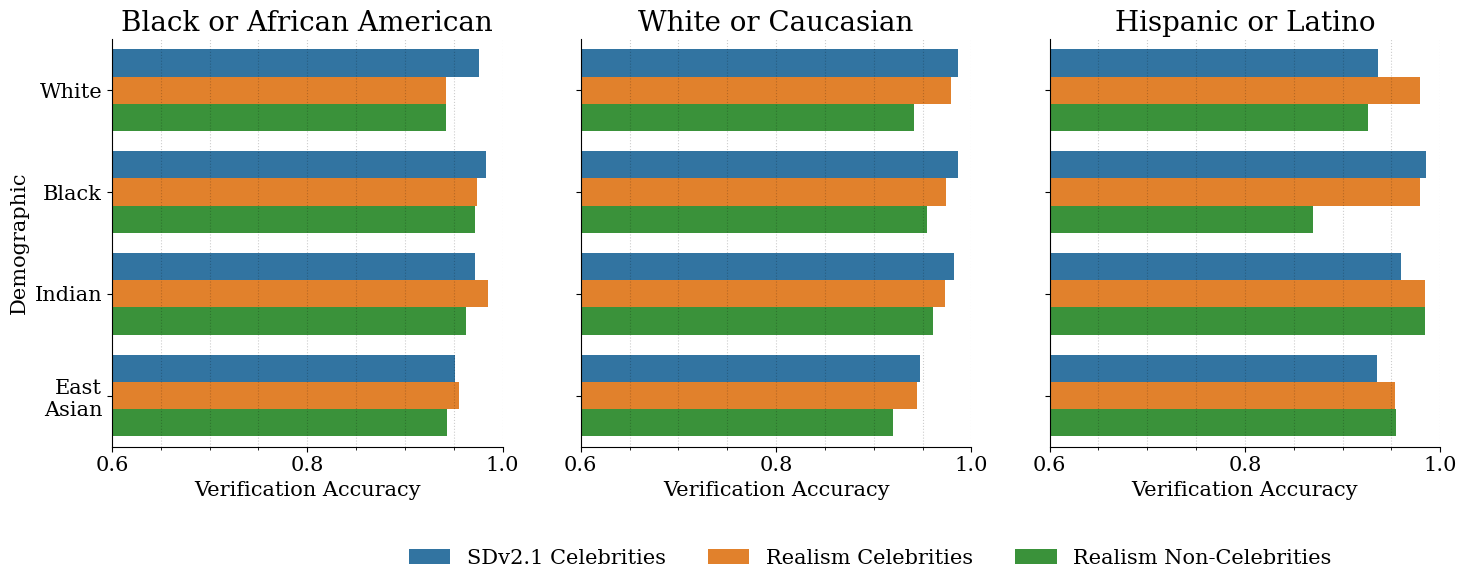

In [28]:
ax = sns.catplot(data=all_results,x='Verification Accuracy',y="Demographic",hue='Dataset',kind='bar',col='Respondent Demographic',col_order=np.roll(cols_fields,1),
                 margin_titles=True,hue_order=['SDv2.1 Celebrities','Realism Celebrities','Realism Non-Celebrities'])
ax.set_titles(fontsize=50,col_template="{col_name}")
ax.set(xlim=[0.6,1],xticks=[0.6,0.8,1])
plt.subplots_adjust(wspace=0.2)
minorLocator = AutoMinorLocator()

for axs in ax.axes.flat:
    axs.tick_params(axis="x", labelsize=15)  # Adjust labelsize as needed
    axs.tick_params(axis="y", labelsize=15)  # Adjust labelsize as needed
    axs.title.set_fontsize(20)
    axs.xaxis.grid(True,which='both',color='black',linestyle='dotted',alpha=0.2) 
    axs.xaxis.set_minor_locator(minorLocator)
    
sns.move_legend(ax, "upper center", bbox_to_anchor=(0.5, -0.05),ncol=4,title=None,fontsize=15)
# ax.set_xticklabels(fontsize=15) 
ax.set_xlabels(fontsize=15)
ax.set_ylabels(fontsize=15)
ax.savefig('respondent_verification_accuracy_final_v2.pdf',dpi=500)

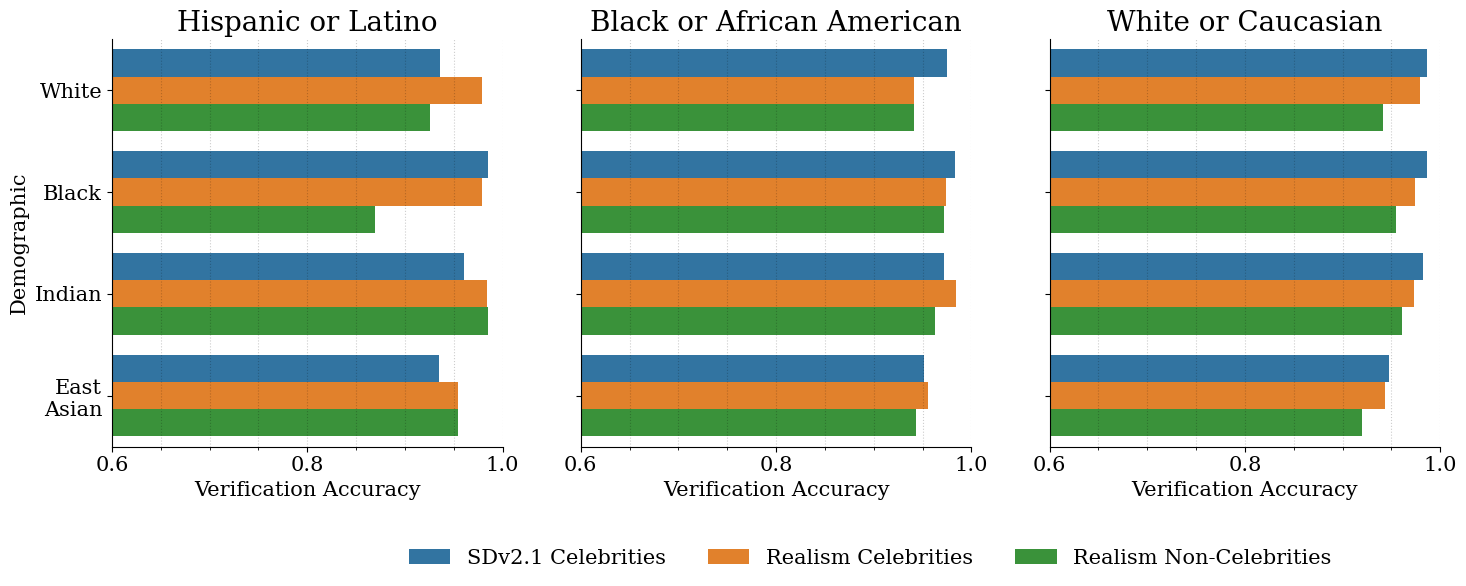

In [29]:
ax = sns.catplot(data=all_results,x='Verification Accuracy',y="Demographic",hue='Dataset',kind='bar',col='Respondent Demographic',col_order=np.roll(cols_fields,-1),
                 margin_titles=True,hue_order=['SDv2.1 Celebrities','Realism Celebrities','Realism Non-Celebrities'])
ax.set_titles(fontsize=50,col_template="{col_name}")
ax.set(xlim=[0.6,1],xticks=[0.6,0.8,1])
plt.subplots_adjust(wspace=0.2)
minorLocator = AutoMinorLocator()

for axs in ax.axes.flat:
    axs.tick_params(axis="x", labelsize=15)  # Adjust labelsize as needed
    axs.tick_params(axis="y", labelsize=15)  # Adjust labelsize as needed
    axs.title.set_fontsize(20)
    axs.xaxis.grid(True,which='both',color='black',linestyle='dotted',alpha=0.2) 
    # axs.axvline(0.5, color='black', linestyle='dashed', linewidth=0.5, alpha=1)
    axs.xaxis.set_minor_locator(minorLocator)
    
    # axs.axvline(0.6, color='black', linestyle='dashed', linewidth=0.5, alpha=1) 
    # axs.axvline(0.5, color='b', linestyle='dashed', linewidth=0.5, alpha=1) 
sns.move_legend(ax, "upper center", bbox_to_anchor=(0.5, -0.05),ncol=4,title=None,fontsize=15)
# ax.set_xticklabels(fontsize=15) 
ax.set_xlabels(fontsize=15)
ax.set_ylabels(fontsize=15)
ax.savefig('respondent_verification_accuracy_final_v3.pdf',dpi=500)